max error: 0.2969860626958392


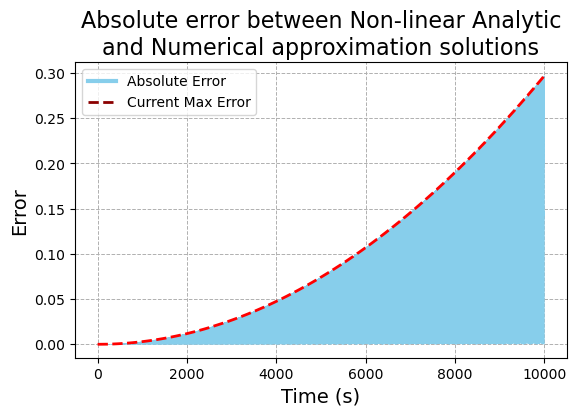

In [59]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipj
from matplotlib.lines import Line2D

# Constants
g = 9.81  # gravity
L = 1.0   # pendulum length

# set up system of differential equations

def pendulum(t, y):
    theta, v = y  
    dtheta_dt = v
    dv_dt = - (g / L) * np.sin(theta) 
    return np.array([dtheta_dt, dv_dt])

def rk4System(f, y0, t0, tf, h):
    t_values = np.arange(t0, tf, h) 
    y_values = np.zeros((len(t_values), len(y0))) 

    y = y0  # Initial state
    for i, t in enumerate(t_values):
        y_values[i] = y  # Store current state
        
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        
        y = y + (k1 + 2*k2 + 2*k3 + k4) / 6

    return t_values, y_values

# Initial conditions
theta0 = 4*np.pi / 5
v0 = 0              
y0 = np.array([theta0, v0])

# parameters
t0 = 0      # Start time
tf = 10000    # End time
h = 0.01    # Time step

# use rk4
t_values, y_values = rk4System(pendulum, y0, t0, tf, h)

theta_values = y_values[:, 0]
v_values = y_values[:, 1]

def pendulumAnalytic(t_values, g, L, theta0):
    omega = np.sqrt(g / L)  # Natural frequency
    theta_values = theta0 * np.cos(omega * t_values)  # Analytic solution

    return theta_values

penAnalytic = pendulumAnalytic(t_values, g, L, theta0)

def theta_formula_2(t, theta0, L, g):
    """Computes theta using the phase-shifted formula with K(k)."""
    k = np.sin(theta0 / 2)
    omega = np.sqrt(g / L)
    K_k = ellipk(k**2)  # Complete elliptic integral of the first kind
    sn_value, _,  _, _ = ellipj(K_k - omega * t, k**2)
    return 2 * np.arcsin(k * sn_value)

theta_2_vals = theta_formula_2(t_values, theta0, L, g)

# #Plot Theta results
# plt.plot(t_values, theta_values, label="Non Linear simulation")
# #plt.plot(t_values, penAnalytic, label="Small angle approximation")
# plt.plot(t_values, theta_2_vals, label="Non Linear analytic")

# plt.xlabel("Time (s)", fontsize=14)
# plt.ylabel("Theta", fontsize=14)
# plt.title("Simple Pendulum Simulation", fontsize=16)

# plt.legend(fontsize=12)

# plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

# plt.savefig('simplePendulumSim_incAnalytic.png', dpi=300)

# plt.show()

error = np.abs(theta_values - theta_2_vals)

print(f'max error: {np.max(error)}')

errorLocMax = error.copy()

for i in range(1, len(errorLocMax)):
    errorLocMax[i] = max(errorLocMax[i], errorLocMax[i-1])

# plot errro propagation
plt.plot(t_values, error, label='Absolute Error', color='skyblue', linewidth = '0.1')  # Main error line
plt.plot(t_values, errorLocMax, '--', label='Current Max Error', color='red', linewidth = '2')  # Dashed errorLocMax line

# Add labels and title
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.title("Absolute error between Non-linear Analytic\nand Numerical approximation solutions", fontsize=16)

# Add grid
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)

plt.tight_layout(pad=3.0)

legend_handles = [
    Line2D([0], [0], color='skyblue', lw=3, label='Absolute Error'),  
    Line2D([0], [0], color='darkred', lw=2, linestyle='--', label='Current Max Error')  
]

# Add the legend
plt.legend(handles=legend_handles)

# Save the plot
plt.savefig('simplePendulumErrorAnalvsNumLongNEW.jpg', dpi=300)

# Show the plot
plt.show()




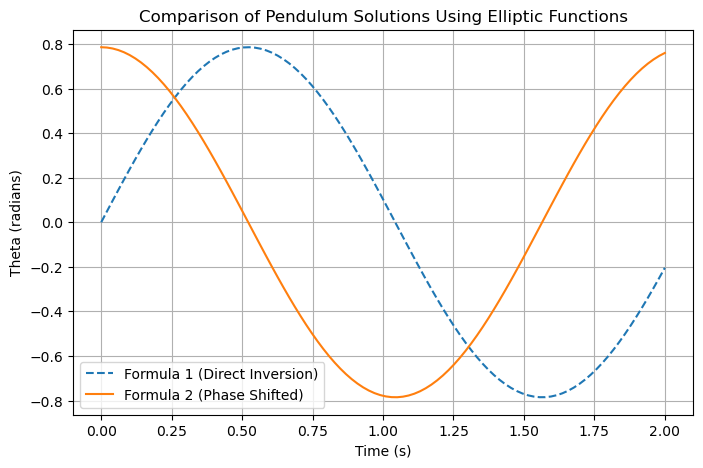

Max absolute difference between formulas: 1.1179418229069218


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipj

def theta_formula_1(t, theta0, L, g):
    """Computes theta using the direct inversion of the elliptic integral."""
    k = np.sin(theta0 / 2)
    omega = np.sqrt(g / L)
    sn_value, _, _, _ = ellipj(omega * t, k**2)
    return 2 * np.arcsin(k * sn_value)

def theta_formula_2(t, theta0, L, g):
    """Computes theta using the phase-shifted formula with K(k)."""
    k = np.sin(theta0 / 2)
    omega = np.sqrt(g / L)
    K_k = ellipk(k**2)  # Complete elliptic integral of the first kind
    sn_value, _,  _, _ = ellipj(K_k - omega * t, k**2)
    return 2 * np.arcsin(k * sn_value)

# Parameters
theta0 = np.radians(45)  # Initial angle in radians
L = 1.0  # Length of pendulum (meters)
g = 9.81  # Acceleration due to gravity (m/s^2)

t_vals = np.linspace(0, 2, 100)  # Time values

theta_1_vals = theta_formula_1(t_vals, theta0, L, g)
theta_2_vals = theta_formula_2(t_vals, theta0, L, g)

diff = np.abs(theta_1_vals - theta_2_vals)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(t_vals, theta_1_vals, label="Formula 1 (Direct Inversion)", linestyle='dashed')
plt.plot(t_vals, theta_2_vals, label="Formula 2 (Phase Shifted)", linestyle='solid')
plt.xlabel("Time (s)")
plt.ylabel("Theta (radians)")
plt.title("Comparison of Pendulum Solutions Using Elliptic Functions")
plt.legend()
plt.grid()
plt.show()

# Print max difference to confirm numerical agreement
print("Max absolute difference between formulas:", np.max(diff))
